# Integrating the HFM library into pyKasso #
C. Fandel 2020 <br>
Purpose: replace the skfmm module with the agd-hfm module to improve network generation capability

TO-DO:
- [ ] label geology colorbar so we know which colors correspond to karstifiable units



In [1]:
import pykasso as pk
import agd

### Set up example system ###

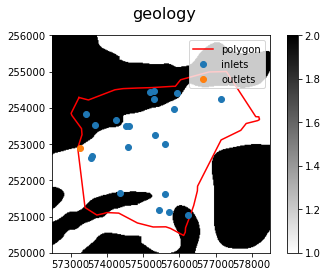

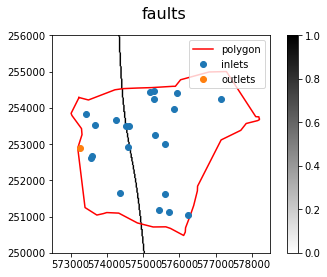

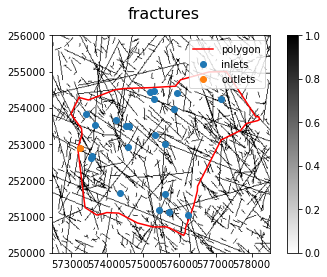

In [3]:
pk.get_settings(example=True)                     #use the settings for the example system already provided with pykasso
betteraz = pk.SKS('inputs/betteraz_cas_1.yaml')   #create an instance of the SKS class and give path to settings file
betteraz.show_catchment(data='geology')           #display the example system geology
betteraz.show_catchment(data='faults')            #display the example system faults
betteraz.show_catchment(data='fractures')         #display the example system fractures

### Compute karst conduit network using default library ###


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


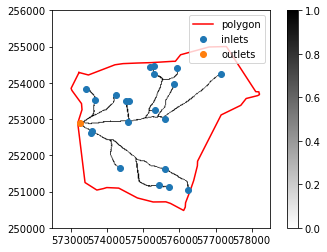

In [9]:
betteraz.compute_karst_network()    #compute network using default parameters (ignore printed output - it is from karstnet)
betteraz.show()                     #display latest network 

### Inputs/outputs for fast-marching ###
For compute_time_map() using skfmm: <br>
`self.maps['time'][iteration] = skfmm.travel_time(self.maps['phi'], self.maps['velocity'][iteration], dx=self.grid.dx, order=2)`
- phi map - location of target point? aka outlet? (array of dim (xres,yres))
- velocity map - how easy it is to travel through each cell (array of dim (xres,yres)) 
- dx - cell length in each dimension (array: [dx,dy])
- order - 1 or 2 (default), order of computational stencil to use in updating points (?)

For agd-hfm: <br>
```hfmIn = Eikonal.dictIn({
    'model':             'Riemann3', #three-dimensional Riemannian eikonal equation (for 2D: Riemann2, for isotropic: Isotropic2 or 3)
    'order':              2,         #recommended setting: 2
    'exportValues':       1,         #output travel time field
    'exportGeodesicFlow': 1          #output walker paths
})
hfmIn.SetRect(sides=[[xmin,xmax],[ymin,ymax],[zmin,zmax]],dims=[xres,yres,zres])
for seed in springs:
    hfmIn['seed'] = seed
    for tip in tips:
        hfmIn['tips'] = [tip]
        hfmIn['metric']    =  F
        hfmOut = hfmIn.Run()
        paths = hfmOut['geodesics']```

